In [42]:
#Type the above code snippet in this code cell and click Run.
#import pandas................
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score



In [43]:
df=pd.read_csv("https://raw.githubusercontent.com//leenaali1114//Titanic-Dataset//main//Titanic_Dataset.csv")

In [44]:
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [45]:
df.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


EDA

0=dead  1=alive
embark
C = Cherbourg.
Q = Queenstow..
S = Southampt.
parch=passengers with parents or children
sibsp=passengers with siblings or spouse
n:

In [46]:
df.shape


(1309, 12)

In [47]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


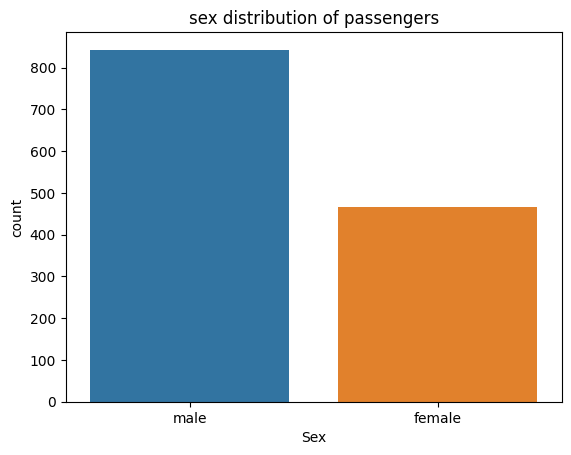

In [49]:
sns.countplot(x='Sex',data=df)
plt.title('sex distribution of passengers')
plt.show()          

C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


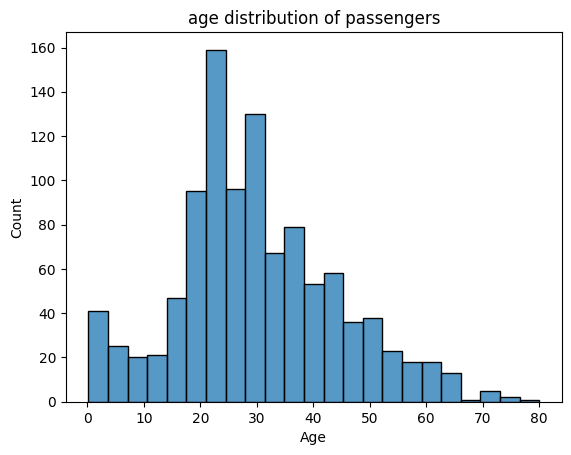

In [50]:
sns.histplot(df['Age'])
plt.title('age distribution of passengers')
plt.show()

C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

AttributeError: 'numpy.int64' object has no attribute 'startswith'

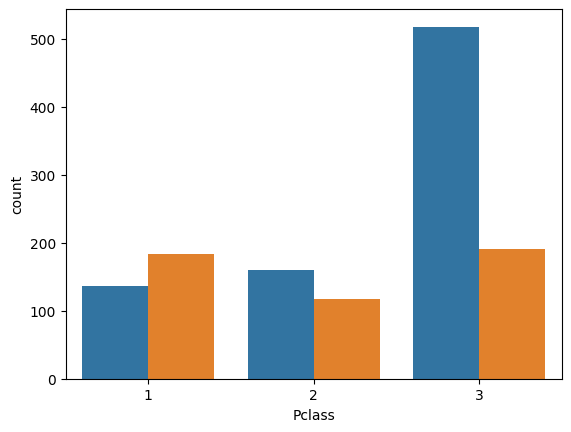

In [119]:
sns.countplot(x='Pclass',data=df,hue='Survived')


C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

AttributeError: 'numpy.int64' object has no attribute 'startswith'

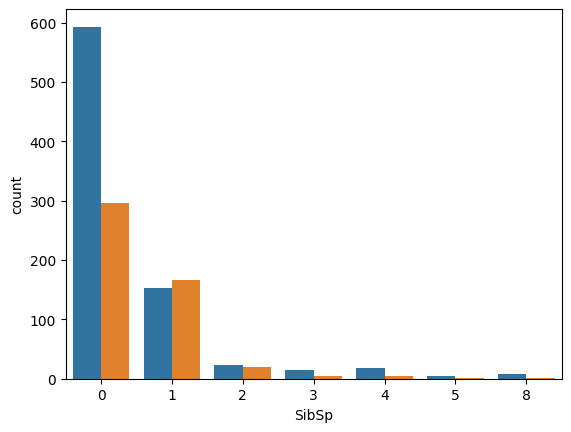

In [114]:
sns.countplot(data=df,x='SibSp',hue='Survived');

C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

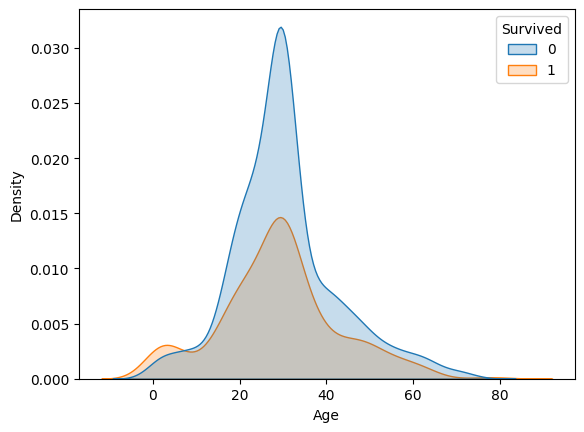

In [115]:
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True);

C:\Users\pamir\AppData\Local\Temp\ipykernel_16560\126608171.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass',y='Survived',ci=None)
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='Pclass', ylabel='Survived'>

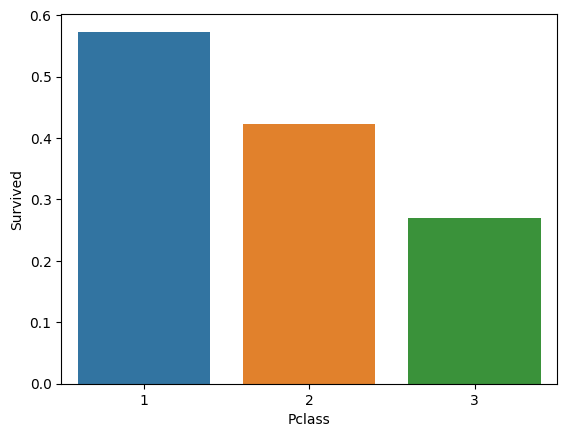

In [118]:
sns.barplot(data=df, x='Pclass',y='Survived',ci=None)

In [52]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)

In [53]:
cols = ['PassengerId']
df = df.drop(cols, axis=1)

In [54]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [56]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [57]:
cols = ['Fare']
df = df.drop(cols, axis=1)

In [58]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [59]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [60]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [61]:
df.dropna(subset=['Embarked'],inplace=True)

In [62]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [63]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
1304,0,3,male,29.881138,0,0,S
1305,1,1,female,39.000000,0,0,C
1306,0,3,male,38.500000,0,0,S
1307,0,3,male,29.881138,0,0,S


In [64]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [65]:
gender = {"male":0,'female':1}
df['Sex'] = df['Sex'].map(gender)

In [66]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1304,0,3,0,29.881138,0,0,S
1305,1,1,1,39.000000,0,0,C
1306,0,3,0,38.500000,0,0,S
1307,0,3,0,29.881138,0,0,S
1308,0,3,0,29.881138,1,1,C


In [67]:
df['Embarked'].unique()
place = {"S":0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].map(place)

In [68]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
1304,0,3,0,29.881138,0,0,0
1305,1,1,1,39.000000,0,0,1
1306,0,3,0,38.500000,0,0,0
1307,0,3,0,29.881138,0,0,0


In [69]:
df.groupby('Survived').size()

Survived
0    815
1    492
dtype: int64

In [70]:
from sklearn.utils import resample

df_dead = df[(df['Survived']== 0)]  
df_alive = df[(df['Survived']== 1)]
# upsample minority class
df_alive_upsampled = resample(df_alive, 
                                 replace=True,    # sample with replacement
                                 n_samples= 815, # to match majority class
                                 random_state=42)  # reproducible results

df = pd.concat([df_dead,df_alive])

In [71]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
4,0,3,0,35.000000,0,0,0
5,0,3,0,29.881138,0,0,2
6,0,1,0,54.000000,0,0,0
7,0,3,0,2.000000,3,1,0
...,...,...,...,...,...,...,...
1300,1,3,1,3.000000,1,1,0
1301,1,3,1,29.881138,0,0,2
1302,1,1,1,37.000000,1,0,2
1303,1,3,1,28.000000,0,0,0


In [72]:
x = df.iloc[:,1:7].values
y = df.iloc[:,0].values

In [73]:
x

array([[ 3.        ,  0.        , 22.        ,  1.        ,  0.        ,
         0.        ],
       [ 3.        ,  0.        , 35.        ,  0.        ,  0.        ,
         0.        ],
       [ 3.        ,  0.        , 29.88113767,  0.        ,  0.        ,
         2.        ],
       ...,
       [ 1.        ,  1.        , 37.        ,  1.        ,  0.        ,
         2.        ],
       [ 3.        ,  1.        , 28.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.        ,  1.        , 39.        ,  0.        ,  0.        ,
         1.        ]])

In [74]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [76]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (914, 6)
y_train:  (914,)
x_test:  (393, 6)
y_test:  (393,)


Logistic Regression

In [77]:
model_lr = LogisticRegression(max_iter = 600)

In [78]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [79]:
y_pred_lr = model_lr.predict(x_test)

In [80]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.8676844783715013


K Nearest Neighbors Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model_knn = KNeighborsClassifier()

In [83]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
y_pred_knn = model_knn.predict(x_test)

In [85]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.8091603053435115


Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
model_dt = DecisionTreeClassifier()

In [88]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred_dt = model_dt.predict(x_test)

In [90]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.811704834605598


Naive Bayes Classifier¶

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
model_nb = GaussianNB()

In [93]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [94]:
y_pred_nb = model_nb.predict(x_test)

In [95]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.8625954198473282


Support Vector Machine

In [96]:
from sklearn.svm import SVC

In [97]:
model_svc = SVC(gamma='auto')

In [98]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [99]:
y_pred_svc = model_nb.predict(x_test)

In [100]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8625954198473282


Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [103]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [104]:
y_pred_rf = model_nb.predict(x_test)

In [105]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8625954198473282


In [106]:
y_test

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [107]:
y_pred_dt

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [108]:
Xnew = [[3,0,22,0,0,1]]

ynew = model_dt.predict(Xnew)

print(ynew)

[0]


In [109]:
Xnew = [[1,0,22,0,0,1]]

ynew = model_dt.predict(Xnew)

print(ynew)

[0]


In [110]:
Xnew = [[1,0,34,0,0,1]]

ynew = model_dt.predict(Xnew)

print(ynew)

[1]


In [111]:
Xnew = [[3,1,34,1,1,1]]

ynew = model_dt.predict(Xnew)

print(ynew)

[1]


In [112]:
Xnew = [[3,0,34,1,1,1]]

ynew = model_dt.predict(Xnew)

print(ynew)

[0]


In [113]:
Xnew = [[3,0,60,0,1,1]]

ynew = model_dt.predict(Xnew)

print(ynew)

[0]
